Simple embedding example using Theano. It demonstrates that embeddings(embedding w1 * embedding w2) conclude
similar points through cost minimization function.

In [1]:
%matplotlib inline

import theano
import numpy as np
import theano.tensor as T
import random
import matplotlib.pyplot as plt
import pylab as p

E = np.asarray(np.random.randn(6, 2))
t_E = theano.shared(E)

In [2]:
t_idxs = T.ivector()

In [3]:
t_embedding_output = t_E[t_idxs]
t_dot_product = T.dot(t_embedding_output[0], t_embedding_output[1])

In [4]:
t_label = T.iscalar()
gradient = T.grad(cost=abs(t_label - t_dot_product), wrt=t_E)
updates = [(t_E, t_E - 0.01 * gradient)]
train = theano.function(inputs=[t_idxs, t_label], outputs=[], updates=updates)

In [5]:
summary0 = []
summary1 = []
summary2 = []
summary3 = []
summary4 = []
summary5 = []

print "i n d0 d1"
for i in range(0, 10000):
    v1, v2 = random.randint(0, 5), random.randint(0, 5)
    label = 1.0 if (v1/2 == v2/2) else 0.0
    train([v1, v2], label)
    if i % 100 == 0:
        for n, embedding in enumerate(t_E.get_value()):
            print i, n, embedding[0], embedding[1]
            
            if n%6 == 0:
                summary0.append(embedding[0])
                summary0.append(embedding[1])
                          
            elif n%6 == 1:
                summary1.append(embedding[0])
                summary1.append(embedding[1])
                    
            elif n%6 == 2:
                summary2.append(embedding[0])
                summary2.append(embedding[1])
            
            elif n%6 == 3:
                summary3.append(embedding[0])
                summary3.append(embedding[1])
                    
            elif n%6 == 4:
                summary4.append(embedding[0])
                summary4.append(embedding[1])
            
            elif n%6 == 5:
                summary5.append(embedding[0])
                summary5.append(embedding[1])    
    

i n d0 d1
0 0 -2.35862809223 -0.40328339232
0 1 1.06672771543 -0.502795102216
0 2 -1.44641832673 -0.456915236948
0 3 1.01809674818 -0.00730732048809
0 4 1.77631185756 -0.347668747857
0 5 -0.419020943037 0.21270778762
100 0 -2.02254092797 -0.402971789305
100 1 0.810916217788 -0.495296094837
100 2 -1.08902940051 -0.42886489781
100 3 0.80812816287 0.0253960749409
100 4 1.31917901237 -0.30975462761
100 5 -0.0555186748605 0.209183516213
200 0 -1.66691085915 -0.385299713144
200 1 0.602602838942 -0.534328970182
200 2 -0.761260011027 -0.419070314142
200 3 0.545509213691 -0.0113442906147
200 4 1.027099418 -0.315189632632
200 5 -0.05436197925 0.135361700718
300 0 -1.49283390839 -0.409384999128
300 1 0.452462447451 -0.617684004666
300 2 -0.65289120009 -0.50935876522
300 3 0.412908083694 0.0237429769303
300 4 0.834406858774 -0.363096472994
300 5 -0.00062771144636 0.0482842331396
400 0 -1.23585131912 -0.415020898511
400 1 0.339346902004 -0.639782830107
400 2 -0.606630841364 -0.502812462983
400 3 0.

In [6]:
plt.rcParams['figure.figsize'] = (5.0, 5.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

[-2.3586280922304992, -2.0225409279746263, -1.6669108591508586, -1.4928339083903137, -1.2358513191161407]
[-0.40328339231974714, -0.40297178930491023, -0.38529971314369171, -0.40938499912805859, -0.41502089851063528]


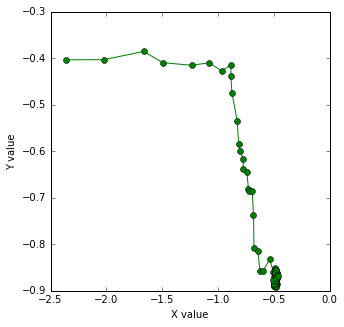

[1.0667277154335033, 0.8109162177877911, 0.602602838942076, 0.45246244745132175, 0.33934690200364148]
[-0.50279510221628299, -0.49529609483690368, -0.5343289701815056, -0.61768400466613949, -0.63978283010712134]


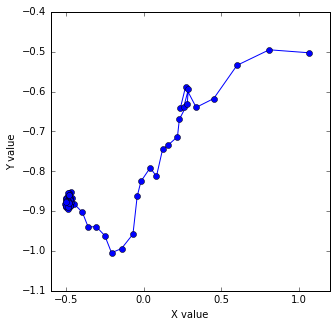

In [7]:
plt.close('all')

def myPlot(myList):
    
    xarray = []
    yarray = []
    
    for i in range(0,len(myList)):
        if i%2 == 0:
            xarray.append(myList[i])
            
        elif i%2 == 1:
            yarray.append(myList[i])
        
    print(xarray[0:5])
    print(yarray[0:5])   
     
    color = ['r','g','b']
    
    rcolor = random.choice(color)
    
    plt.plot(xarray, yarray, rcolor, marker='o')
    plt.xlabel('X value')
    plt.ylabel('Y value')
    plt.show()

    
myPlot(summary0)
myPlot(summary1)

[-1.4464183267297535, -1.0890294005144621, -0.76126001102665997, -0.65289120008988299, -0.6066308413636925]
[-0.45691523694787967, -0.42886489781026699, -0.41907031414184603, -0.50935876521985091, -0.50281246298273718]


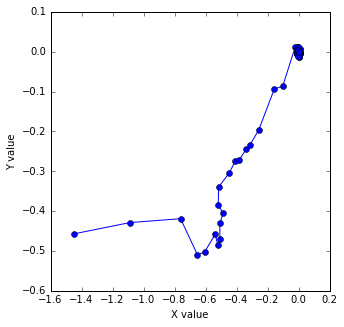

[1.0180967481783534, 0.80812816286974232, 0.54550921369053273, 0.41290808369438198, 0.30191778426172483]
[-0.0073073204880865442, 0.025396074940896865, -0.011344290614689091, 0.023742976930291097, 0.031729331857526459]


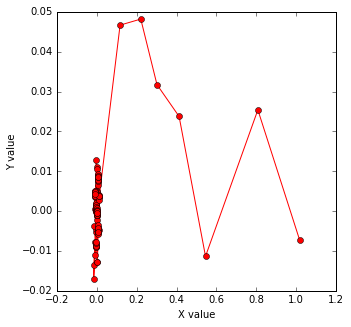

[1.7763118575605985, 1.319179012370352, 1.0270994179989175, 0.834406858774003, 0.7106327085194909]
[-0.34766874785746643, -0.30975462761029027, -0.3151896326315759, -0.36309647299431125, -0.37751196661924635]


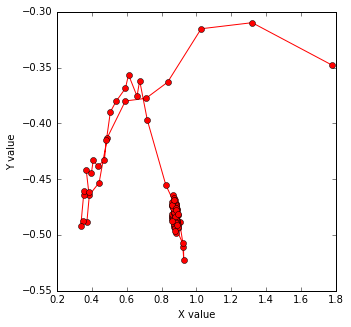

[-0.419020943037407, -0.055518674860541448, -0.054361979249991463, -0.00062771144635978028, -0.0068012813321360055]
[0.21270778762044601, 0.20918351621295669, 0.13536170071813602, 0.048284233139636208, 8.7003631231690609e-06]


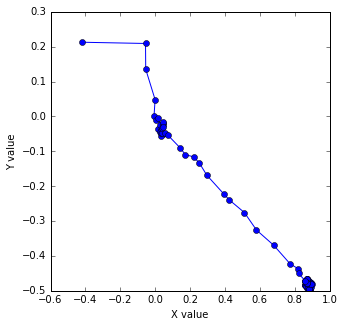

In [8]:
myPlot(summary2)
myPlot(summary3)
myPlot(summary4)
myPlot(summary5)